In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvbmlzc2ltL0RvY3VtZW50cy9kZXYvZGF0b3MtZXNjYWxhLWh1bWFuYS9lbi9weXRob24tZ2Vvc3BhdGlhbA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/importlib/_bootstrap.py": 1740066604.249645, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/importlib/_bootstrap_external.py": 1740066604.250645, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/zipimport.py": 1740066603.7756515, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/codecs.py": 1740066603.590654, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/encodings/aliases.py": 1740066603.9236495, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/encodings/__init__.py": 1740066603.9216495, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/encodings/utf_8.py": 1740066604.0876472, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/abc.py": 1740066603.5696542, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/io.py": 1740066603.6426532, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/stat.py": 1740066603.727652, "/home/nissim/.pyenv/versions/3.12.2/lib/python3.12/_collections_abc.py": 1740066603.5506544, "/home

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from owslib.wfs import WebFeatureService
from io import StringIO, BytesIO

partidos_path = "../../public/python-geoespacial/pba_partidos.parquet"

# Load partidos from ARBA GeoServer WFS service
if os.path.exists(partidos_path):
    partidos = gpd.read_parquet(partidos_path)
else:
    # Connect to WFS (Web Feature Service)
    wfs_url = "https://geo.arba.gov.ar/geoserver/idera/wfs"
    wfs = WebFeatureService(url=wfs_url, version="2.0.0")

    # Request the Departamento layer (partidos)
    response = wfs.getfeature(
        typename="idera:Departamento",
        srsname="EPSG:5347",  # Original CRS
    )

    # Convert WFS response to GeoDataFrame
    partidos = gpd.read_file(BytesIO(response.read()))

    # Save to cache for future use
    partidos.to_parquet(partidos_path)

# Reproject to working CRS
partidos = partidos.to_crs("EPSG:5348")  # POSGAR 2007 / Argentina 4

In [3]:
partidos.head()

,gml_id,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
0,Departamento.437,065,06505,Partido de Magdalena,Partido,Magdalena,ARBA,1849.53,1785.29,"MULTIPOLYGON (((6435320.257 6134850.321, 64352..."
1,Departamento.434,090,06686,Partido de Rojas,Partido,Rojas,ARBA,2060.72,1978.87,"MULTIPOLYGON (((6128472.001 6214278.169, 61285..."
2,Departamento.436,058,06455,Partido de Las Flores,Partido,Las Flores,ARBA,3341.36,3340.27,"MULTIPOLYGON (((6292198.682 5974257.073, 62916..."
3,Departamento.485,031,06266,Partido de Exaltación de la Cruz,Partido,Exaltación de la Cruz,ARBA,636.36,634.17,"MULTIPOLYGON (((6286757.47 6218024.36, 6286781..."
4,Departamento.435,046,06364,Partido de General Rodríguez,Partido,General Rodríguez,ARBA,365.40,360.14,"MULTIPOLYGON (((6327496.29 6167316.466, 632748..."


<Axes: >

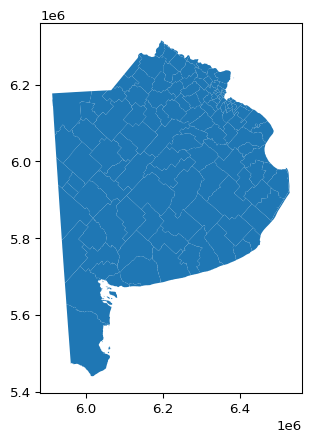

In [4]:
partidos.plot()

In [5]:
la_plata = partidos[partidos["fna"] == "Partido de La Plata"]

la_plata.head()

,gml_id,cca,cde,fna,gna,nam,sag,ara3,arl,geometry
11,Departamento.496,055,06441,Partido de La Plata,Partido,La Plata,ARBA,892.63,942.23,"MULTIPOLYGON (((6395811.772 6128078.545, 63970..."


<Axes: >

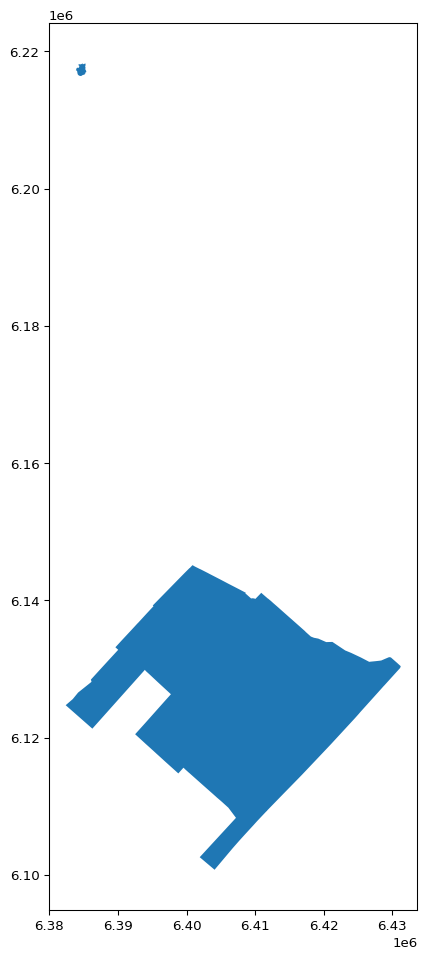

In [6]:
la_plata.plot(figsize=(12, 12))

In [7]:
print(la_plata.geometry.iloc[0].geom_type)

MultiPolygon


In [8]:
# Get the main geometry and keep only the largest polygon
la_plata = la_plata.copy()
main_geom = la_plata.geometry.iloc[0]
la_plata.loc[la_plata.index[0], "geometry"] = max(main_geom.geoms, key=lambda p: p.area)

In [9]:
print(la_plata.geometry.iloc[0].geom_type)

Polygon


<Axes: >

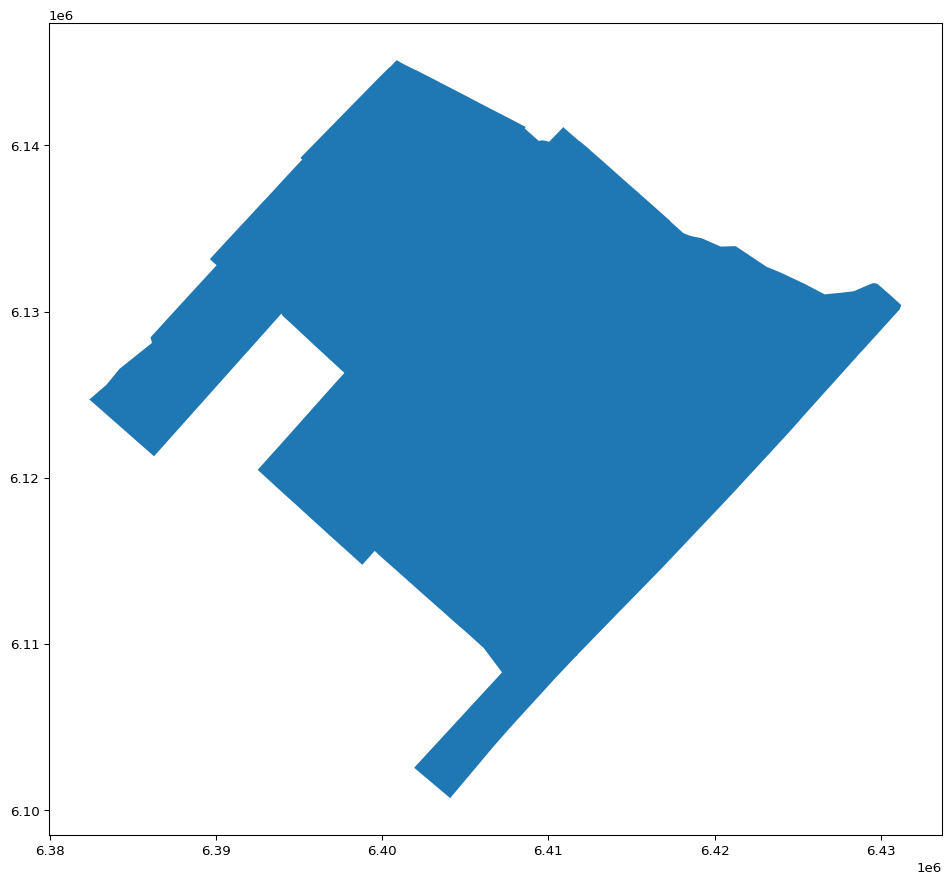

In [10]:
la_plata.plot(figsize=(12, 12))

In [11]:
import pystac_client
from odc.stac import load
import rioxarray as rio

# Reproject to geographic CRS for bounding box query
aoi = la_plata.to_crs("EPSG:4326")

# Configure AWS for unsigned requests (no login required)
os.environ["AWS_NO_SIGN_REQUEST"] = "YES"
os.environ["GDAL_DISABLE_READDIR_ON_OPEN"] = "EMPTY_DIR"

# Connect to Element84 Earth Search STAC catalog
catalog = pystac_client.Client.open("https://earth-search.aws.element84.com/v1")

# Get bounding box for our area of interest
# bbox format: [min_x, min_y, max_x, max_y]
bbox = aoi.total_bounds

# Search for Copernicus DEM tiles covering our area
# cop-dem-glo-30 is the global 30m elevation dataset
search = catalog.search(
    collections=["cop-dem-glo-30"],
    bbox=bbox,
)

# Get the items (files) that cover our area
items = list(search.items())

# Load DSM using chunks for efficient memory processing
# odc.stac.load automatically downloads and assembles the necessary tiles
dsm = load(
    items,
    bbox=bbox,
    chunks={"x": 1024, "y": 1024},  # Process in blocks for efficiency
)

# Extract elevation band and convert to DataArray for use with rioxarray
# load() returns a Dataset; we need the elevation DataArray
dsm = dsm["data"].squeeze()  # Remove extra dimensions

# Clip raster to exact geometries
dsm_clipped = dsm.rio.clip(aoi.geometry)

# Reproject clipped area to working CRS (POSGAR 2007 / Argentina 4)
# This is more efficient because we reproject only the area of interest
dsm_reproj = dsm_clipped.rio.reproject(dst_crs="EPSG:5348")

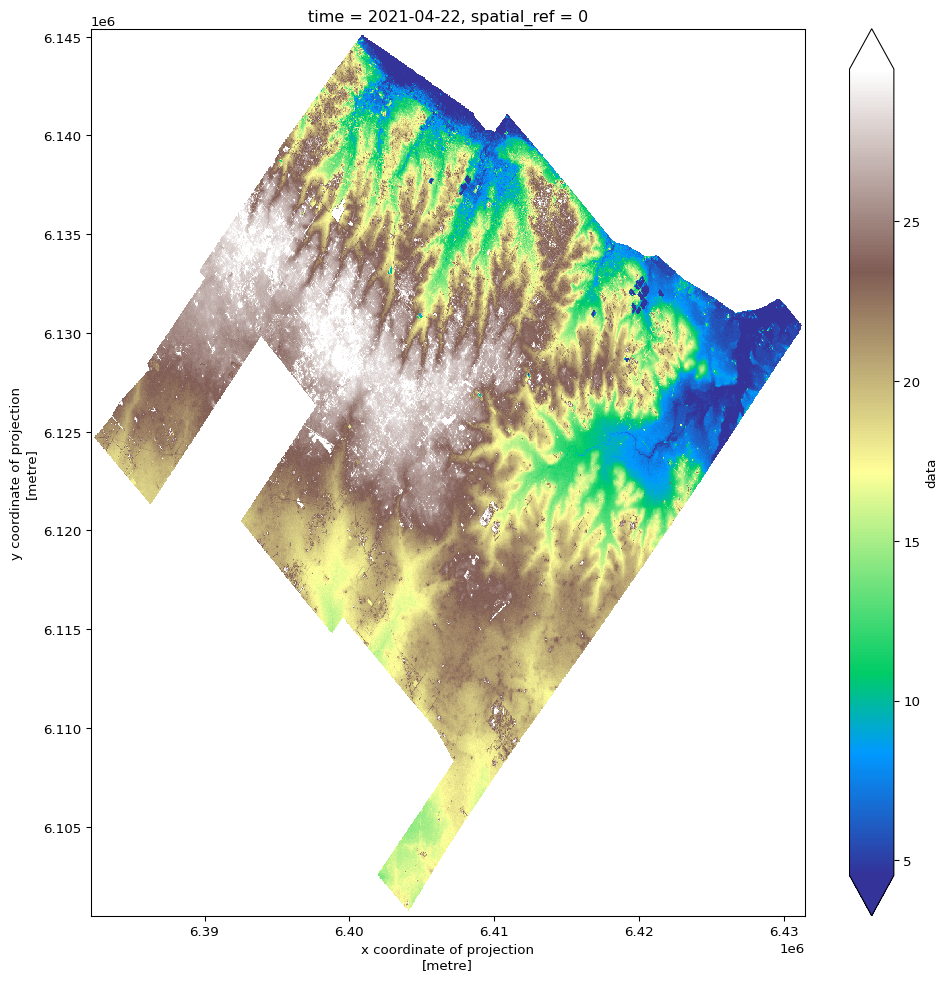

In [12]:
dsm_reproj.plot(robust=True, cmap="terrain", figsize=(12, 12))

In [13]:
import numpy as np
from rasterstats import zonal_stats

la_plata = la_plata.copy()

# Extract elevation statistics (min, mean, median, max)
stats = zonal_stats(
    la_plata,
    dsm_reproj.squeeze().values,
    affine=dsm_reproj.rio.transform(),
    stats=["min", "mean", "median", "max"],
    nodata=np.nan,
)

# Add the statistics as new columns
la_plata["dsm_min"] = [s["min"] for s in stats]
la_plata["dsm_mean"] = [s["mean"] for s in stats]
la_plata["dsm_median"] = [s["median"] for s in stats]
la_plata["dsm_max"] = [s["max"] for s in stats]

la_plata[
    [
        "fna",
        "dsm_min",
        "dsm_mean",
        "dsm_median",
        "dsm_max",
    ]
]

,fna,dsm_min,dsm_mean,dsm_median,dsm_max
11,Partido de La Plata,-4.320292,19.391156,20.339926,52.470333


In [14]:
suelo_2022_ruta = "https://storage.googleapis.com/mapbiomas-public/initiatives/argentina/collection-1/coverage/argentina_coverage_2022.tif"

# Open the raster with rioxarray and chunks
suelo_2022 = rio.open_rasterio(
    suelo_2022_ruta,
    chunks={"x": 4096, "y": 4096},
)

# Clip in the raster's native CRS (EPSG:4326)
suelo_2022_clipped = suelo_2022.rio.clip(
    aoi.geometry.values,
    from_disk=True,
)

# Reproject to working CRS (POSGAR 2007 / Argentina 4)
suelo_2022 = suelo_2022_clipped.rio.reproject(dst_crs="EPSG:5348")

# Mask NoData values
suelo_2022_masked = suelo_2022.where(
    (suelo_2022 != suelo_2022.rio.nodata) & (suelo_2022 != 255)
)

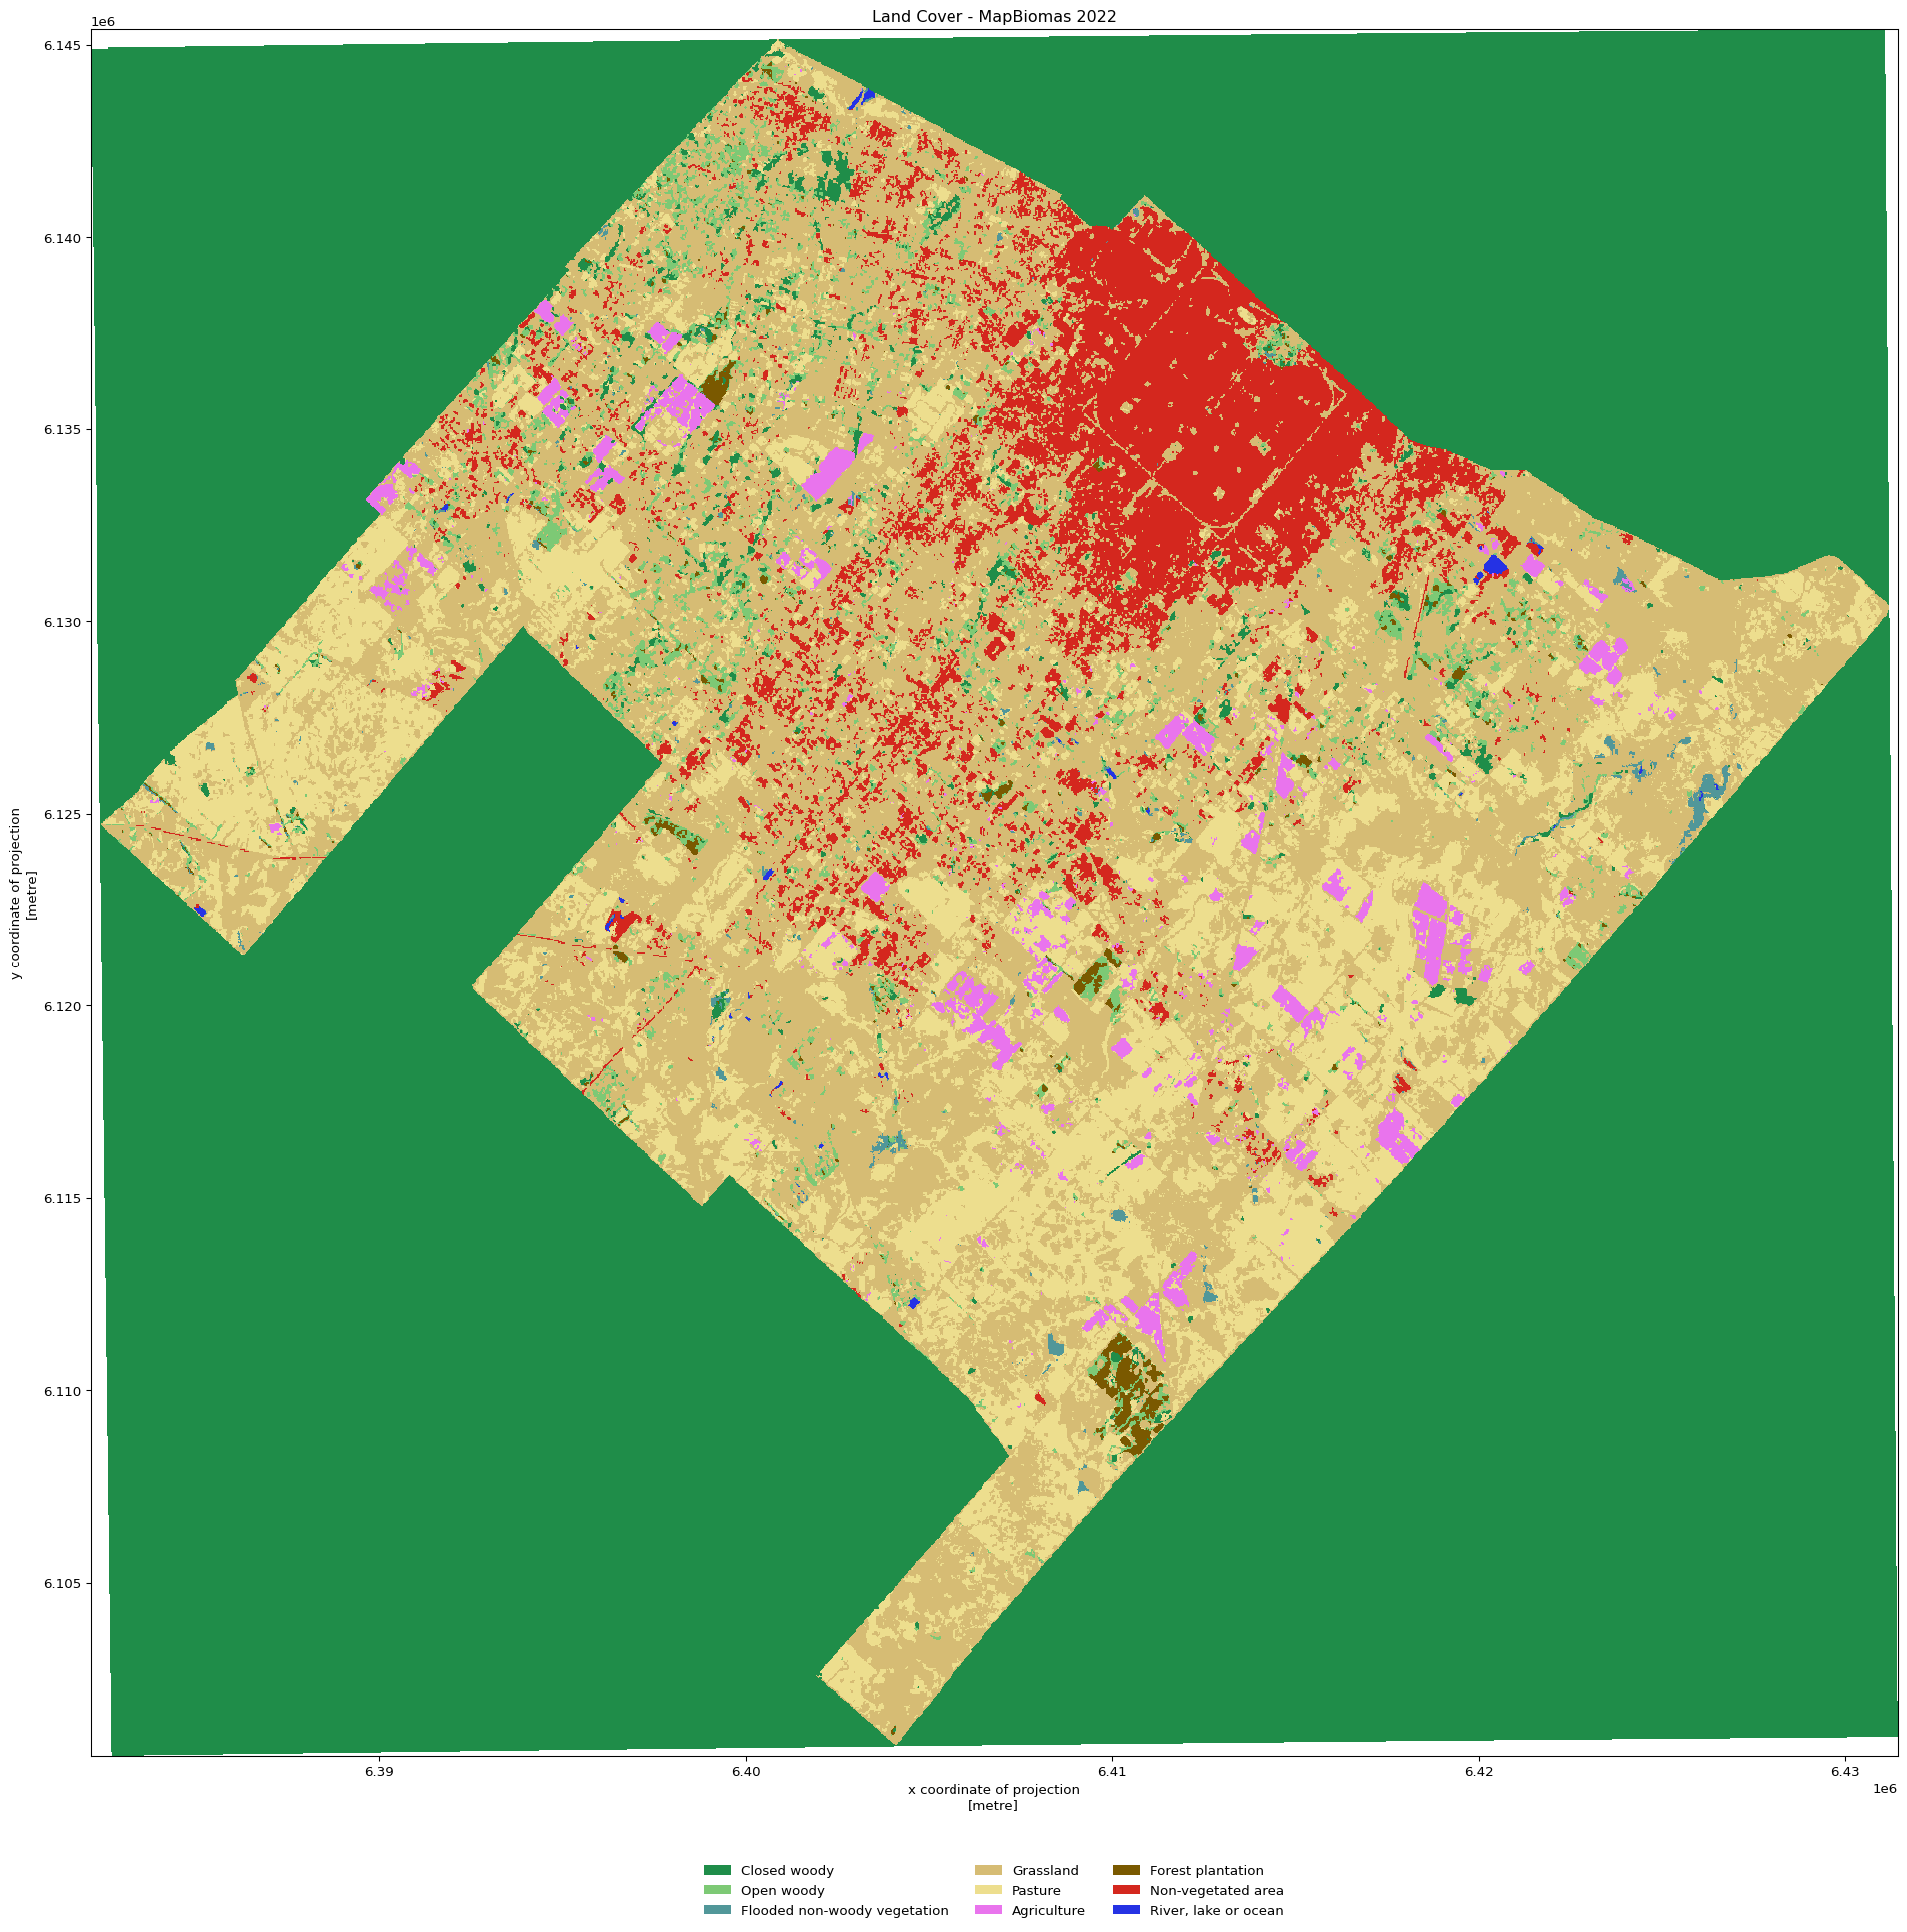

In [15]:
#| code-fold: true
#| code-summary: "Show legend and formatting code"

import matplotlib.colors as mcolors

# Define land cover categories with their IDs and MapBiomas colors
categories = {
    "Closed woody": {"ids": [3], "color": "#1f8d49"},
    "Open woody": {"ids": [4], "color": "#7dc975"},
    "Sparse woody": {"ids": [45], "color": "#807a40"},
    "Flooded woody": {"ids": [6], "color": "#026975"},
    "Flooded non-woody vegetation": {"ids": [11], "color": "#519799"},
    "Grassland": {"ids": [12], "color": "#d6bc74"},
    "Steppe": {"ids": [63], "color": "#ebf8b5"},
    "Pasture": {"ids": [15], "color": "#edde8e"},
    "Agriculture": {"ids": [18], "color": "#e974ed"},
    "Forest plantation": {"ids": [9], "color": "#7a5900"},
    "Shrub crop": {"ids": [36], "color": "#d082de"},
    "Agricultural mosaic": {"ids": [21], "color": "#ffefc3"},
    "Non-vegetated area": {"ids": [22], "color": "#d4271e"},
    "River, lake or ocean": {"ids": [33], "color": "#2532e4"},
    "Ice and surface snow": {"ids": [34], "color": "#93dfe6"},
    "Not observed": {"ids": [27], "color": "#ffffff"},
}

# Get the unique IDs present in the data
unique_values = np.unique(
    suelo_2022_masked.values[~np.isnan(suelo_2022_masked.values)]
).astype(int)
present_ids = set(unique_values)

# Filter only the categories that appear in our data
present_categories = {
    name: info
    for name, info in categories.items()
    if any(id in present_ids for id in info["ids"])
}

# Create color map
colors_by_id = {}
for info in categories.values():
    for pixel_id in info["ids"]:
        colors_by_id[pixel_id] = info["color"]

sorted_ids = sorted(colors_by_id.keys())
cmap = mcolors.ListedColormap([colors_by_id[i] for i in sorted_ids])
norm = mcolors.BoundaryNorm(sorted_ids, cmap.N)

# Visualize the land cover raster
fig, ax = plt.subplots(figsize=(20, 20))
suelo_2022_masked.plot(ax=ax, cmap=cmap, norm=norm, add_colorbar=False)

# Create legend only with the present categories
legend = [
    plt.Rectangle((0, 0), 1, 1, facecolor=info["color"], label=name)
    for name, info in present_categories.items()
]

ax.legend(
    handles=legend,
    loc="lower center",
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=False,
)

plt.title("Land Cover - MapBiomas 2022")
plt.tight_layout()
plt.show()

In [16]:
# Extract raster values and remove NoData
values = suelo_2022_masked.values.flatten()
values = values[~np.isnan(values)]

# Count pixels of each unique ID
unique_ids, counts = np.unique(values, return_counts=True)

# Group IDs by coverage category
counts_by_category = {}
for name, info in categories.items():
    total = sum(
        counts[unique_ids == pixel_id][0] if pixel_id in unique_ids else 0
        for pixel_id in info["ids"]
    )
    if total > 0:
        counts_by_category[name] = {"count": total, "color": info["color"]}

# Calculate percentages
total_pixels = sum(cat["count"] for cat in counts_by_category.values())
for name in counts_by_category:
    percentage = (counts_by_category[name]["count"] / total_pixels) * 100
    counts_by_category[name]["percentage"] = percentage

# Sort from highest to lowest percentage
sorted_categories = sorted(
    counts_by_category.items(), key=lambda x: x[1]["percentage"], reverse=True
)

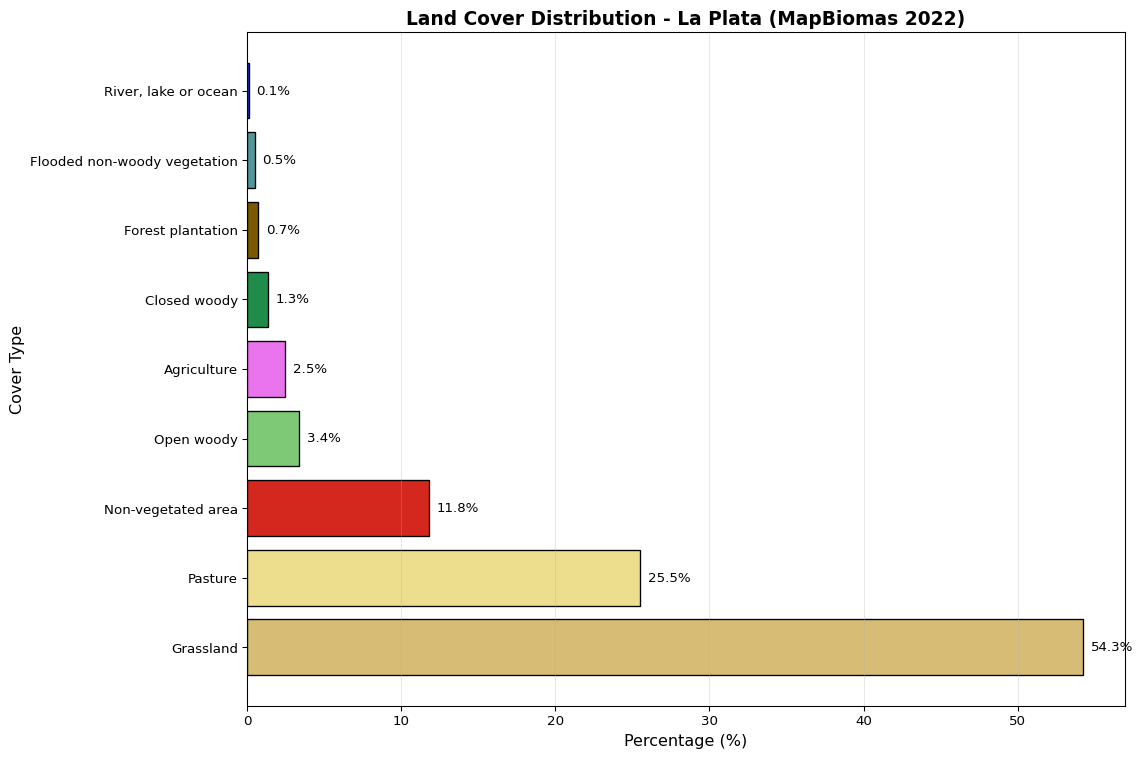

In [17]:
#| code-fold: true
#| code-summary: "Show chart formatting code"

# Create horizontal bar chart
fig, ax = plt.subplots(figsize=(12, 8))

names = [cat[0] for cat in sorted_categories]
percentages = [cat[1]["percentage"] for cat in sorted_categories]
colors = [cat[1]["color"] for cat in sorted_categories]

bars = ax.barh(names, percentages, color=colors, edgecolor="black")



ax.set_xlabel("Percentage (%)", fontsize=12)
ax.set_ylabel("Cover Type", fontsize=12)
ax.set_title(
    "Land Cover Distribution - La Plata (MapBiomas 2022)",
    fontsize=14,
    fontweight="bold",
)
ax.grid(True, alpha=0.3, axis="x")

# Add percentage labels on the bars
for bar, pct in zip(bars, percentages):
    ax.text(
        pct + 0.5,
        bar.get_y() + bar.get_height() / 2,
        f"{pct:.1f}%",
        va="center",
        fontsize=10,
    )

plt.tight_layout()
plt.show()

In [18]:
import duckdb
import pandas as pd

# Get bounding box of La Plata in WGS84 (EPSG:4326) for cloud query
bounds_4326 = la_plata.to_crs("EPSG:4326").total_bounds

# Configure DuckDB with spatial and network extensions
con = duckdb.connect()
con.execute("INSTALL spatial")
con.execute("LOAD spatial")
con.execute("INSTALL httpfs")
con.execute("LOAD httpfs")

# Configure DuckDB for S3 cloud storage access
con.execute("SET s3_region='us-east-1'")
con.execute("SET s3_endpoint='data.source.coop'")
con.execute("SET s3_use_ssl=true")
con.execute("SET s3_url_style='path'")

# Query buildings within our bounding box and save to temporary file
# This filters buildings using geographic bounds (bbox) to load only those in our area of interest
temp_file = "buildings_filtered.parquet"
query = f"""
COPY (
    SELECT *
    FROM 's3://vida/google-microsoft-open-buildings/geoparquet/by_country/country_iso=ARG/ARG.parquet'
    WHERE bbox.xmax >= {bounds_4326[0]} AND bbox.xmin <= {bounds_4326[2]} AND
          bbox.ymax >= {bounds_4326[1]} AND bbox.ymin <= {bounds_4326[3]}
) TO '{temp_file}' (FORMAT PARQUET);
"""
con.execute(query)

# Read filtered building data from Parquet file
buildings_df = pd.read_parquet(temp_file)

# Deserialize geometries: convert from binary format (WKB - Well-Known Binary) to GeoSeries objects
# GeoParquet stores geometries as bytes in WKB format, we need to convert them to GeoPandas geometries
buildings_df["geometry"] = gpd.GeoSeries.from_wkb(buildings_df["geometry"])

# Create GeoDataFrame with deserialized geometries
# Specify original CRS as EPSG:4326 (WGS84) since data comes in that coordinate system
buildings = gpd.GeoDataFrame(buildings_df, geometry="geometry", crs="EPSG:4326")

# Reproject to working CRS to match other analysis data
buildings = buildings.to_crs("EPSG:5348")

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [19]:
# Spatial join: keep only buildings that intersect with La Plata polygon
buildings_in_la_plata = gpd.sjoin(buildings, la_plata, predicate="intersects", how="inner")

# Count total buildings
total_buildings = len(buildings_in_la_plata)

print(f"Total buildings in La Plata: {total_buildings:,}")

Total buildings in La Plata: 625,936


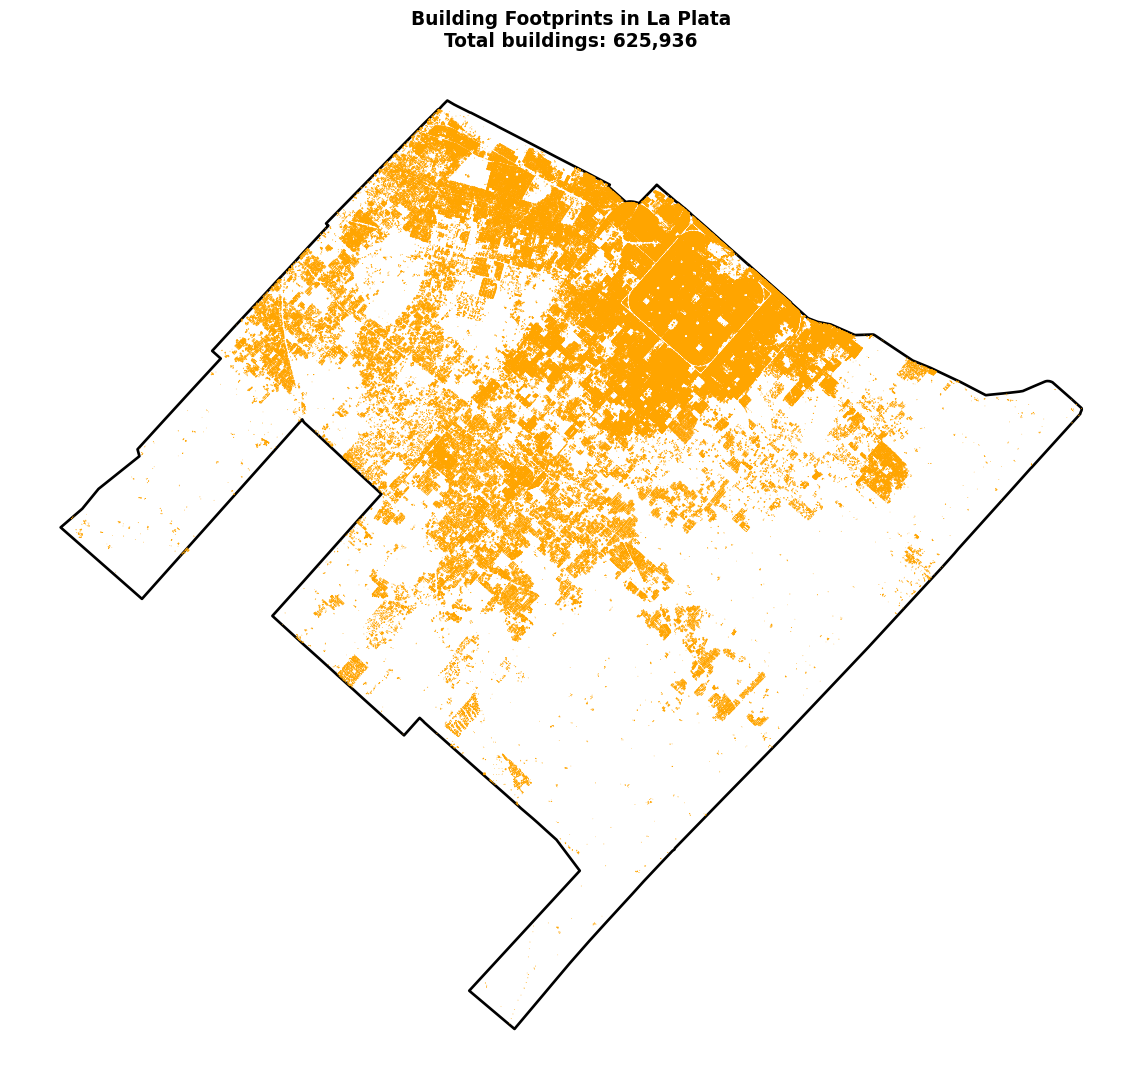

In [20]:
#| code-fold: true
#| code-summary: "Show map visualization code"

# Visualize buildings within La Plata
fig, ax = plt.subplots(figsize=(12, 12))

# Plot La Plata boundary
la_plata.plot(ax=ax, facecolor="none", edgecolor="black", linewidth=2)

# Plot buildings with orange outlines
buildings_in_la_plata.plot(ax=ax, facecolor="none", edgecolor="orange", linewidth=0.5)

ax.set_title(f"Building Footprints in La Plata\nTotal buildings: {total_buildings:,}",
             fontsize=14, fontweight="bold")
ax.set_xticks([])
ax.set_yticks([])
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_visible(False)

plt.tight_layout()
plt.show()